In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
custom_params = {
    "axes.spines.right": False, 
    "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params, font_scale=1.45)

## General Performance

In [94]:
# load general_performance.csv in a dataframe
df_gp = pd.read_csv("general_performance.csv")
# rename columns Unnamed: 0 to ""
df_gp = df_gp.rename(columns={"Unnamed: 0": ""})
# set index to ""
df_gp = df_gp.set_index("")
df_gp

,c,python,java
,,,
initialize,1.252786,0.638989,5.512573
compile,0.060677,0.000000,0.602499
load_code,0.009731,0.143787,0.015050
execute,0.174659,3.230006,2.311504


## Load code performance

                c      python        java          js
count  100.000000  100.000000  100.000000  100.000000
mean     0.007444    0.143241    0.020961    0.059496
std      0.001794    0.003234    0.007544    0.006227
min      0.005315    0.136230    0.012865    0.054979
25%      0.006090    0.139941    0.015656    0.056282
50%      0.006838    0.143068    0.018260    0.058029
75%      0.008094    0.146359    0.024930    0.059555
max      0.012565    0.153116    0.055030    0.101382


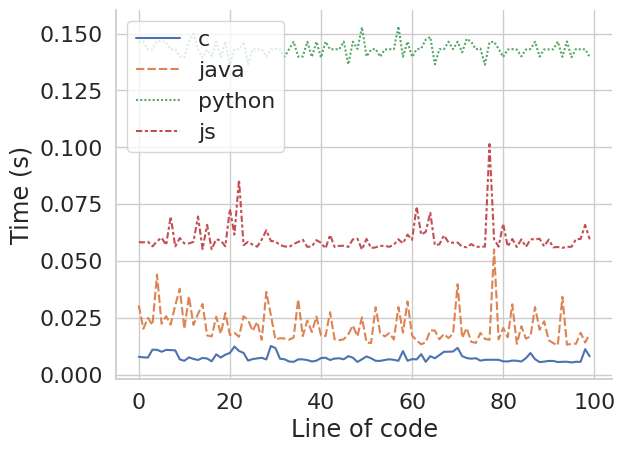

In [4]:
df_lcp = pd.read_csv("load_code_performance.csv")
# drop first column
df_lcp = df_lcp.drop(columns=["Unnamed: 0"])
print(df_lcp.describe())
# swap order of columns
df_lcp = df_lcp[["c", "java", "python", "js"]]
with sns.plotting_context(font_scale=2):
    sns.lineplot(data=df_lcp)
    plt.xlabel("Line of code")
    plt.ylabel("Time (s)")

                c        java
count  100.000000  100.000000
mean     0.072194    0.754992
std      0.015663    0.080543
min      0.053901    0.643996
25%      0.066542    0.695770
50%      0.068645    0.738869
75%      0.071764    0.796821
max      0.197724    1.103604


Text(0, 0.5, 'Time (s)')

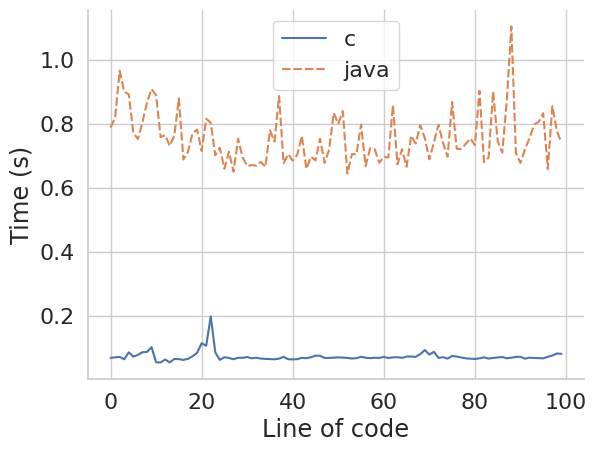

In [5]:
df_ccp = pd.read_csv("compile_code_performance.csv")
# drop first column
df_ccp = df_ccp.drop(columns=["Unnamed: 0"])
print(df_ccp.describe())
sns.lineplot(data=df_ccp)
plt.xlabel("Line of code")
plt.ylabel("Time (s)")

## Execute code performance

Text(0, 0.5, 'Time (s)')

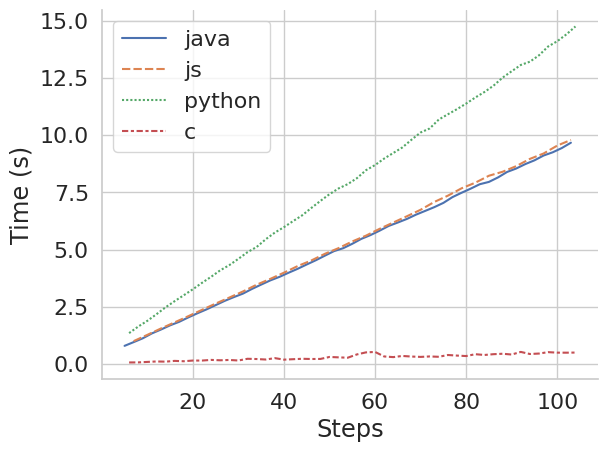

In [3]:
df_ep = pd.read_csv("execute_performance.csv")
# rename columns Unnamed: 0 to steps
df_ep = df_ep.rename(columns={"Unnamed: 0": "steps"})
# set index to steps
df_ep = df_ep.set_index("steps")
sns.lineplot(data=df_ep)
plt.xlabel("Steps")
plt.ylabel("Time (s)")

In [19]:
df_jdi = pd.read_csv("jdi_times.csv")
del df_jdi["Unnamed: 0"]
df_jdi = df_jdi.rename(columns={"time": "jdi", "step": ""})
df_jdi = df_jdi.set_index("")
df_jdi

,jdi
,
6,0.008415
8,0.010257
10,0.011579
12,0.016276
14,0.018245
16,0.017810
18,0.019933
20,0.020487
22,0.022747


Text(0.5, 0, 'Steps')

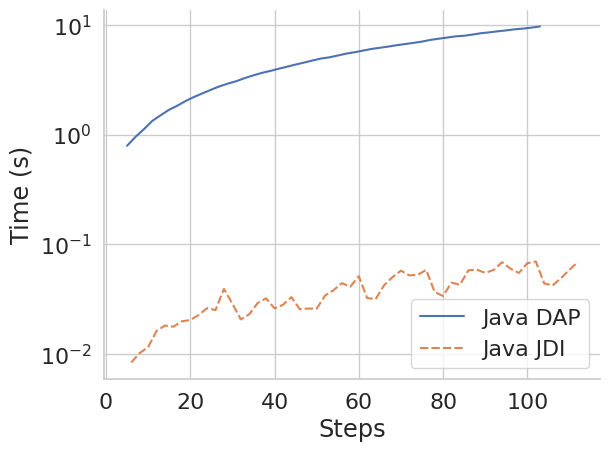

In [23]:
# concat df_ep["java"] and df_jdi["jdi"] in a new dataframe
df_javacmp = pd.concat([df_ep["java"], df_jdi["jdi"]], axis=1)
df_javacmp = df_javacmp.rename(columns={"java": "Java DAP", "jdi": "Java JDI"})
sns.lineplot(data=df_javacmp)
# log scale on y axis
plt.yscale("log")
plt.ylabel("Time (s)")
plt.xlabel("Steps")

               c     python       java         js
count  50.000000  50.000000  50.000000  33.000000
mean    0.006682   0.152435   0.100768   0.100163
std     0.001948   0.018353   0.011713   0.008626
min     0.004775   0.140032   0.093466   0.093274
25%     0.005492   0.141837   0.094463   0.094964
50%     0.006028   0.145993   0.095957   0.096982
75%     0.007197   0.152623   0.100889   0.101149
max     0.014098   0.229239   0.153990   0.131219


Text(0, 0.5, 'Time (s)')

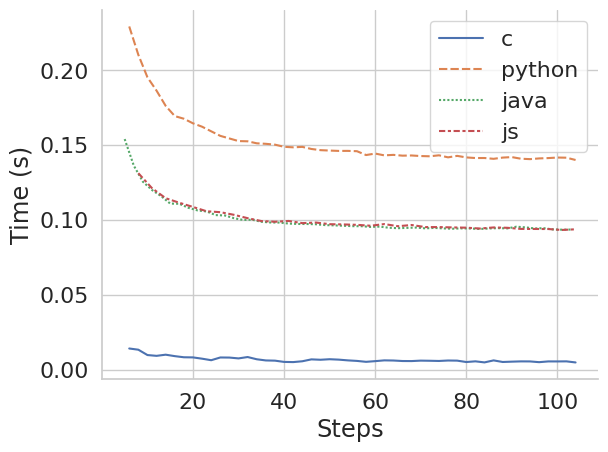

In [3]:
#time per step
df_tps = df_ep.copy()
df_tps.index = df_tps.index.astype(int)
df_tps = df_tps.div(df_tps.index, axis=0)
print(df_tps.describe())
sns.lineplot(data=df_tps)
plt.xlabel("Steps")
plt.ylabel("Time (s)")

## Binary Search Scenario

In [3]:
import json
with open("scenario/binary_search_c_times.json", 'r') as file:
    bsc_data = json.load(file)

with open("scenario/binary_search_python_times.json", 'r') as file:
    bspy_data = json.load(file)
    
with open("scenario/binary_search_java_times.json", 'r') as file:
    bsj_data = json.load(file)
    
with open("scenario/binary_search_javascript_times.json", 'r') as file:
    bsjs_data = json.load(file)
sns.set_theme(style="white", rc=custom_params, font_scale=1.8)

In [9]:
def plot_scenario(data, init):
    df_bsc_data = pd.DataFrame(data).T
    # make index as int and column
    df_bsc_data.index = df_bsc_data.index.astype(int)
    #add init for the first step
    df_bsc_data.loc[0] += init
    #plot the exec time on y axi on the left and step on y axis on the right
    # set the y axis to be between 0 and 15
    g = sns.lineplot(data=df_bsc_data["exec"], color="red")
    plt.ylim(0, 15)
    plt.ylabel("Time (s)")
    # plot step on y axis on the right
    h = sns.lineplot(data=df_bsc_data["step"], ax=g.twinx(), color="blue")
    # x axis step in int
    plt.xlabel("Versions")
    plt.ylabel("Stack Recording Size")
    # make the tick on x axis int and not float
    g.xaxis.set_major_locator(plt.MaxNLocator(10))
    # add labels (blue = tim and red = size)
    plt.legend(handles=[g.lines[0], h.lines[0]], labels=["Time", "Stack Recording Size"],
        )

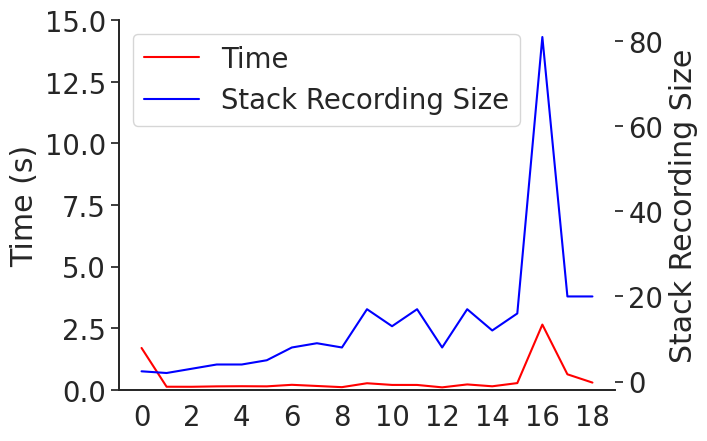

In [10]:
plot_scenario(bsc_data["scenario"],float(bsc_data["init"]))

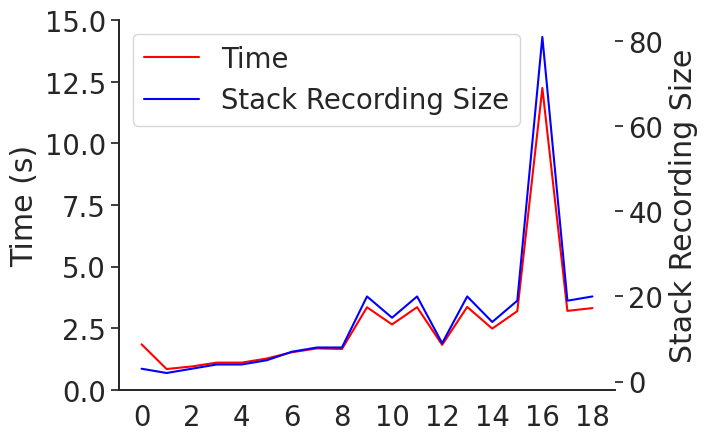

In [11]:
plot_scenario(bspy_data["scenario"],float(bspy_data["init"]))

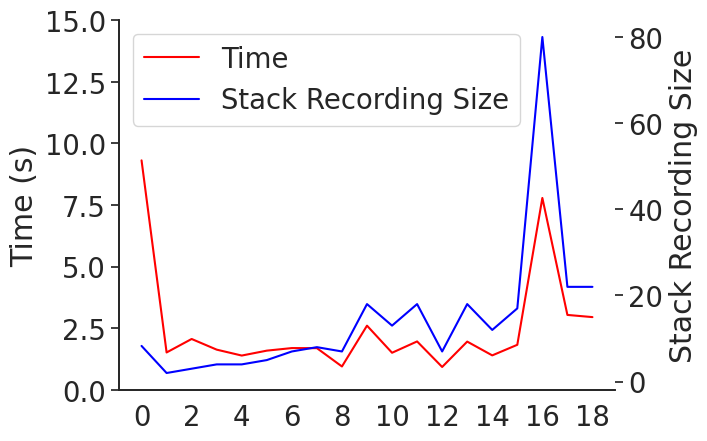

In [12]:
plot_scenario(bsj_data["scenario"],float(bsj_data["init"]))

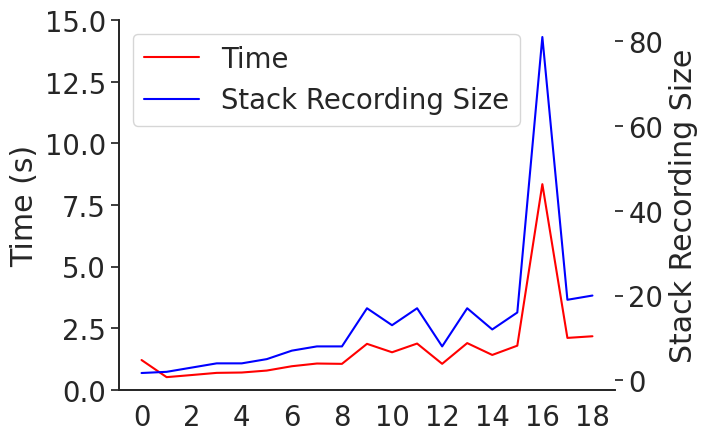

In [13]:
plot_scenario(bsjs_data["scenario"],float(bsjs_data["init"]))